## Simple Linear Regression Using Tensorflow

Examples modified from Hands-On Machine Learning with Scikit-Learn & Tensorflow

Using some matrix algebra we can calculate coefficients for a linear regression model. Theta is this vector and it is calculated with the formula below where $X$ is a matrix of features and $y$ is the label vector. We will run this model below using Tensorflow.

$$
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^{T}\cdot y
$$

In [1]:
import numpy as np
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
m, n = housing.data.shape

In [4]:
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [5]:
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

We add a row of ones. This will give us a y intercept.

In [6]:
housing_data_plus_bias[:,:3]

array([[ 1.    ,  8.3252, 41.    ],
       [ 1.    ,  8.3014, 21.    ],
       [ 1.    ,  7.2574, 52.    ],
       ...,
       [ 1.    ,  1.7   , 17.    ],
       [ 1.    ,  1.8672, 18.    ],
       [ 1.    ,  2.3886, 16.    ]])

In [7]:
X = tf.constant(
    housing_data_plus_bias, 
    dtype = tf.float32,
    name = "X"
)

y = tf.constant(
    housing.target.reshape(-1, 1),
    dtype = tf.float32,
    name = "y"
)

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

Next will actually run the model we built above.

In [8]:
with tf.Session() as sess:
    theta_value = theta.eval()

The theta output is shown below. The first value is the intercept.

In [9]:
theta_value.round(1)

array([[-37.2],
       [  0.4],
       [  0. ],
       [ -0.1],
       [  0.6],
       [ -0. ],
       [ -0. ],
       [ -0.4],
       [ -0.4]], dtype=float32)

In [10]:
predictions = []
row = housing.data[:1000,:]
predictions.append(theta_value[:1] + row.dot(theta_value[1:9]))

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

We can visualize our predicted values versus the actual values. Perfectly predicted values will result in a straight-line.

In [12]:
predictions = np.asarray(predictions)

In [13]:
target = housing.target[:1000]
target = target.reshape(1, -1)
predictions = predictions.reshape(1, -1)

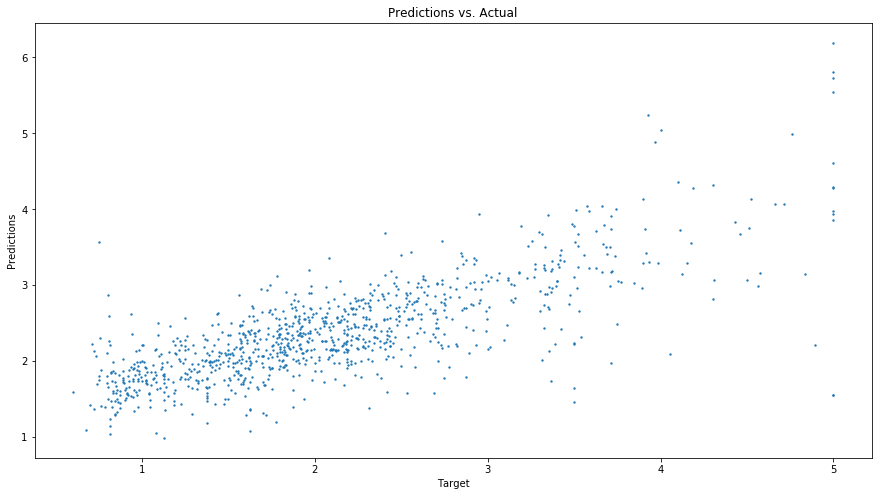

In [14]:
plt.figure(figsize=(15,8))
plt.scatter(target, predictions, alpha=0.9, s = 2)
plt.xlabel('Target')
plt.ylabel('Predictions')
plt.title('Predictions vs. Actual')
plt.show()

## Implementing Gradient Descent

### Manually Computing the Gradients

In [15]:
n_epochs = 1000
learning_rate = 0.01

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(housing_data_plus_bias)
scaled_housing = scaler.transform(housing_data_plus_bias)

In [17]:
X = tf.constant(
    scaled_housing,
    dtype=tf.float32,
    name = "X"
)

y = tf.constant(
    housing.target.reshape(-1, 1),
    dtype=tf.float32,
    name = "y"
)

theta = tf.Variable(
    tf.random_uniform([n + 1, 1], -1.0, 1.0),
    name = "theta"
)

y_pred = tf.matmul(X, theta, name = "predictions")

error = y_pred - y

# Computes the mean of elements across dimensions of a tensor
mse = tf.reduce_mean(
    tf.square(error), 
    name = "mse"
)

gradients = 2 / m * tf.matmul(tf.transpose(X), error)

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

logs_dir = './events_tf'

tf.summary.scalar('training_op', training_op)

with tf.Session() as sess:

    writer = tf.summary.FileWriter(logs_dir)
    writer.add_graph(sess.graph)

    sess.run(init)
    
    for epoch in range(n_epochs):
        
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
        
    best_theta = theta.eval()
    
writer.close()

Epoch 0 MSE = 7.9621005
Epoch 100 MSE = 1.9168667
Epoch 200 MSE = 1.4873219
Epoch 300 MSE = 1.3921164
Epoch 400 MSE = 1.3262887
Epoch 500 MSE = 1.2701684
Epoch 600 MSE = 1.2209827
Epoch 700 MSE = 1.1773533
Epoch 800 MSE = 1.1382849
Epoch 900 MSE = 1.1030253
